In [107]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd


#### Part I

In [108]:
## Looad points 

with open('points.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

blue_points = loaded_data['blue_points']
black_points = loaded_data['black_points']

blue_points[:,0]

array([1., 1., 1., ..., 1., 1., 1.])

In [109]:
## TODO Calculate perspective projections of all blue and black points

black_points.shape
focal_length =  10.0

def perspective_projections(focal_length, points):
    projections = {"X_proj":[], "Y_proj":[]}
    for point in points:
        x, y, z = point
        x_proj = (x * focal_length) / z
        y_proj = (y * focal_length) / z
        projections["X_proj"].append(x_proj)
        projections["Y_proj"].append(y_proj)
    return pd.DataFrame(projections)

black_points_projection = perspective_projections(focal_length, black_points)
blue_points_projection = perspective_projections(focal_length, blue_points)
# black_points_proj.plot.scatter(x="X_proj", y="Y_proj")
# plt.show()



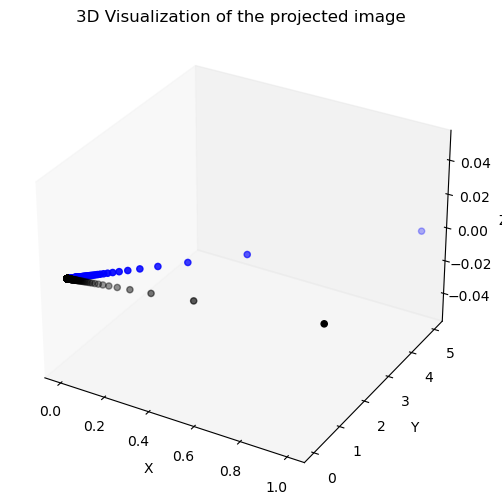

In [110]:


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


black_points_projection.plot.scatter(x="X_proj", y="Y_proj", ax=ax, color="black")
blue_points_projection.plot.scatter(x="X_proj", y="Y_proj", ax=ax, color="blue")

ax.set_xlabel("X")

ax.set_ylabel("Y")

ax.set_zlabel("Z")

ax.set_title("3D Visualization of the projected image")
plt.show()

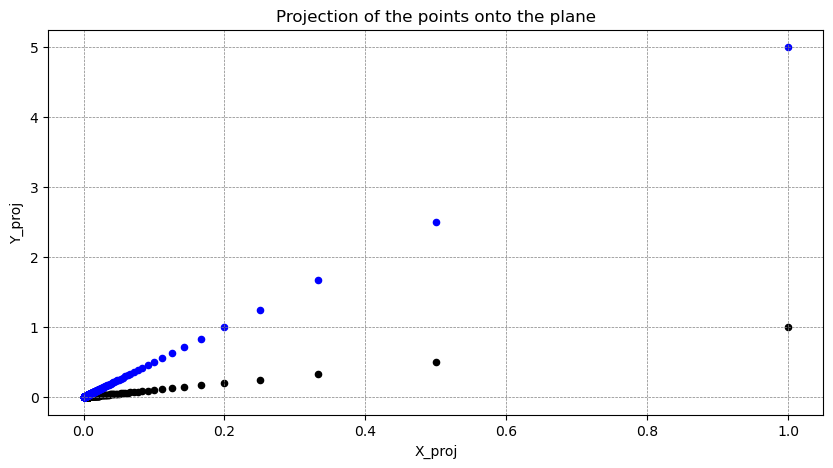

In [111]:

fig, ax = plt.subplots(figsize=(10, 5))

black_points_projection.plot.scatter(x="X_proj", y="Y_proj", ax=ax, color="black")
blue_points_projection.plot.scatter(x="X_proj", y="Y_proj", ax=ax, color="blue")

ax.set_xlabel("X_proj")
ax.set_ylabel("Y_proj")
ax.set_title("Projection of the points onto the plane")
ax.grid(True, linewidth = 0.5, color = "grey", linestyle = "--")   
plt.show()

In [112]:
# distance calculator
def distance_calculator(point1, point2):
    differeces = (point1 - point2)**2
    return (differeces.sum(axis=1))**0.5





The distance between between first blue and firs black  points is 4.0
The distance between between last blue and last black  points is 4.000000000000001e-06


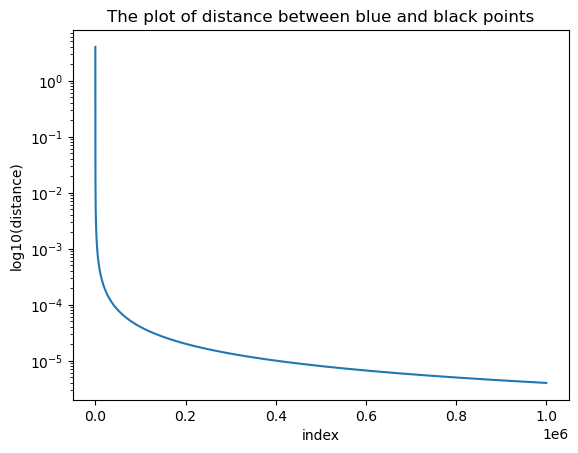

In [113]:
## TODO calculate the distance between each corresponding pair of blue and black  point after projection
## Plot the distance 
distances = distance_calculator(black_points_projection, blue_points_projection) # calculate the distance using the distance calculators

print(f"The distance between between first blue and firs black  points is {distances[0]}")
print(f"The distance between between last blue and last black  points is {distances[len(distances)-1]}")


plt.plot(distances, label='black')
plt.yscale('log')
plt.title('The plot of distance between blue and black points')
plt.ylabel('log10(distance)')
plt.xlabel('index')
plt.show()

In [114]:
## #TODO plot the image and include in your report
def normalize_points(points, min_vals, max_vals):
    normalized_points = (points - min_vals) / (max_vals - min_vals)
    return normalized_points

def scale_points(normalized_points, size):
    scaled_points = (normalized_points * (size - 1)).astype(int)
    return scaled_points

def draw_points_on_image(image, points, value=255):
    for point in points:
        image[point[1], point[0]] = value

def display_image(image):
    plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
    plt.imshow(image, cmap='gray')  # Assuming a grayscale image
    plt.title('Projected Points as Image')
    plt.axis('off')  # Hide the axis
    plt.show()

def create_image(blue_points, black_points, image_size=(500, 500)):
    # Combine all points to find global min and max
    all_projected_points = np.vstack((blue_points.values, black_points.values))

    min_vals = np.min(all_projected_points, axis=0)
    max_vals = np.max(all_projected_points, axis=0)

    
    # Normalize the points to [0, 1]
    normalized_blue = normalize_points(blue_points.values, min_vals, max_vals)
    normalized_black = normalize_points(black_points.values, min_vals, max_vals)

    # Scale to [0, size-1]
    scaled_blue = scale_points(normalized_blue, image_size[0])
    scaled_black = scale_points(normalized_black, image_size[1])

    # Create an empty image
    image = np.zeros(image_size, dtype=int)

    # Draw the points on the image
    draw_points_on_image(image, scaled_blue, value=255)  # setting the blue points to white for visibility
    draw_points_on_image(image, scaled_black, value=128)  # setting the black points to grey for visibility

    # Display the image
    display_image(image)
    # print(image)

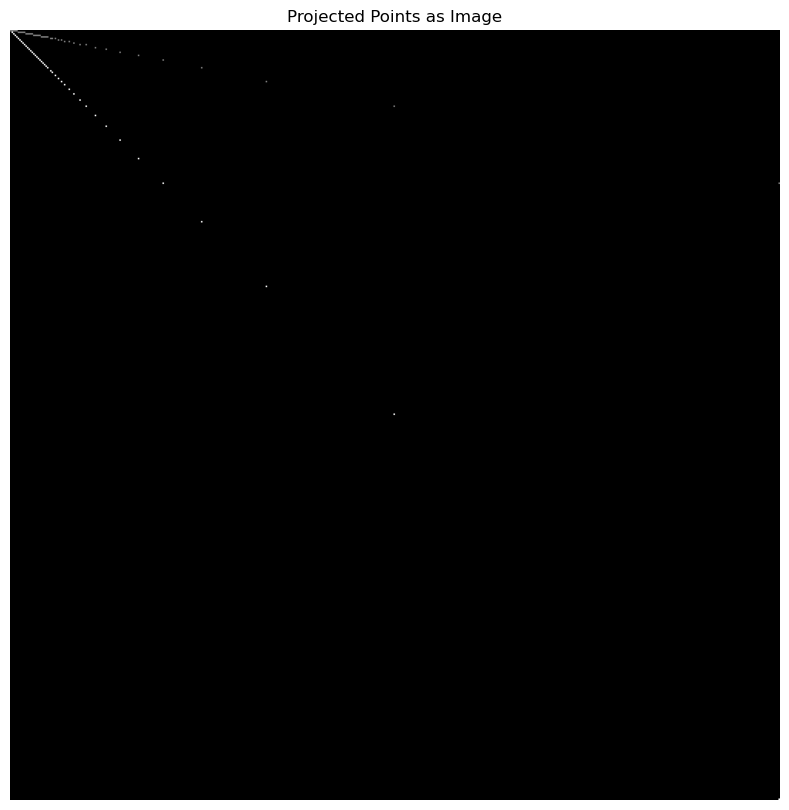

In [115]:

# blue_points_projection and black_points_projection have to  DataFrames
create_image(blue_points_projection, black_points_projection)


Bayer Image with missing pixels


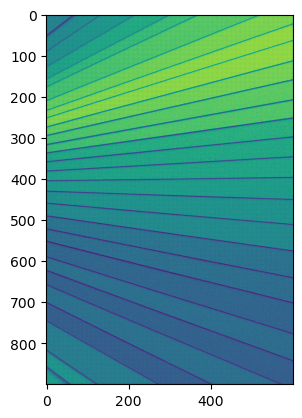

In [116]:
with open('data.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
print("Bayer Image with missing pixels")
plt.imshow(loaded_data)
# plt.show()



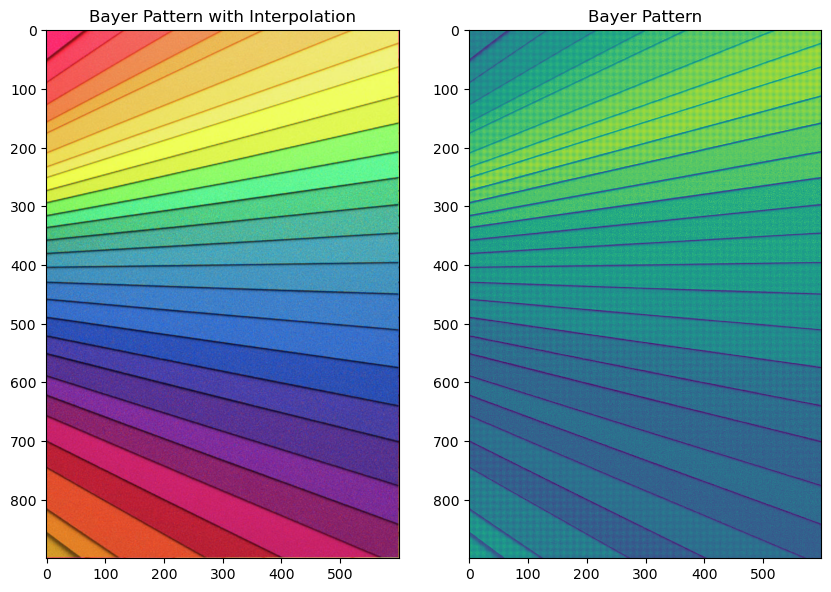

In [117]:
def bayer2rgb(input_image, img_height, img_width):
    # Initialize an RGB image with zeros
    output_image = np.zeros([img_height, img_width, 3], dtype=np.uint8)
    
    # Pad the input image for edge pixel handling
    padded_input = np.pad(input_image, ((1, 1), (1, 1)), mode='reflect')
    
    # Iterate through image pixels
    for y in range(img_height):
        for x in range(img_width):
            # Red channel for even rows and even columns
            if y % 2 == 1 and x % 2 == 1:
                output_image[y - 1, x - 1, 0] = padded_input[y, x]  #  Red
                output_image[y - 1, x - 1, 1] = (padded_input[y, x-1] + padded_input[y, x+1] + padded_input[y-1, x] + padded_input[y+1, x]) // 4  # Green
                output_image[y - 1, x - 1, 2] = (padded_input[y-1, x-1] + padded_input[y-1, x+1] +padded_input[y+1, x-1] + padded_input[y+1, x+1]) // 4  # Blue
            
            # Green channel for odd rows and even columns
            elif y % 2 == 0 and x % 2 == 1:
                output_image[y - 1, x - 1, 0] = (padded_input[y-1, x] + padded_input[y+1, x]) // 2  # Red
                output_image[y - 1, x - 1, 1] = padded_input[y, x]  # Set Green
                output_image[y - 1, x - 1, 2] = (padded_input[y, x-1] + padded_input[y, x+1]) // 2  #Blue


            # Blue channel for odd rows and odd columns
            elif y % 2 == 0 and x % 2 == 0:
                output_image[y - 1, x - 1, 0] = (padded_input[y-1, x-1] + padded_input[y-1, x+1] +padded_input[y+1, x-1] + padded_input[y+1, x+1]) // 4  # Red
                output_image[y - 1, x - 1, 2] = padded_input[y, x]  # Set Blue
                output_image[y - 1, x - 1, 1] = (padded_input[y, x-1] + padded_input[y, x+1] + padded_input[y-1, x] + padded_input[y+1, x]) // 4  # Green


            # Green channel for even rows and odd columns
            elif y % 2 == 1 and x % 2 == 0:
                
                output_image[y - 1, x - 1, 0] = (padded_input[y, x-1] + padded_input[y, x+1]) // 2  # Set Red
                output_image[y - 1, x - 1, 1] = padded_input[y, x]  # Set Green
                output_image[y - 1, x - 1, 2] = (padded_input[y-1, x] + padded_input[y+1, x]) // 2  # Set Blue


    return output_image

# call the function on our image
color_data = bayer2rgb(loaded_data, loaded_data.shape[0], loaded_data.shape[1])
img_rgb = Image.fromarray(color_data)

# Display the results and compare to the orignal image
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(img_rgb)
ax[0].set_title('Bayer Pattern with Interpolation')

ax[1].imshow(loaded_data)  # Assuming loaded_data is a grayscale Bayer pattern
ax[1].set_title('Bayer Pattern')
plt.show()

Here is the result for your reference in evaluating your performance
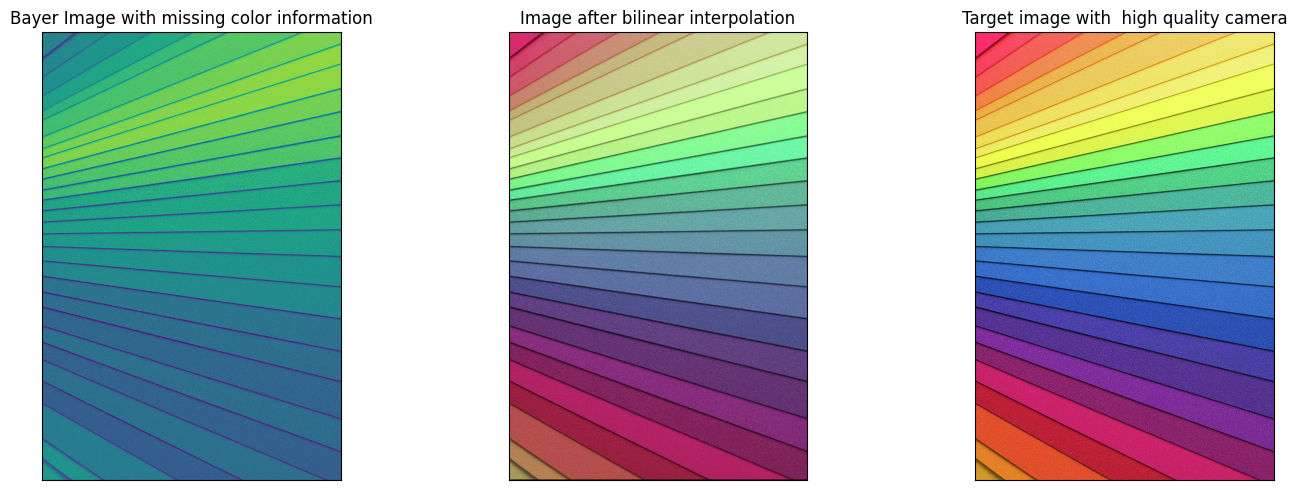